### Exploratory Data Analysis

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

Reading Datasets

In [2]:
text = pd.read_csv('./datasets/text.csv').drop(columns=['Unnamed: 0']).dropna(subset=['all_text'])
tickers = pd.read_csv('./datasets/tickers.csv').drop(columns=['Unnamed: 0']).dropna(subset=['ticker_text'])

In [3]:
text.head(3)

,subreddit,title,selftext,all_text
0,wallstreetbets,"Made 45k on QQQ puts in 3 days, will finally p...",NaN,Made k on QQQ puts in days will finally pay of...
1,wallstreetbets,There is a mining program giving unprecedented...,NaN,There is a mining program giving unprecedented...
2,wallstreetbets,TUESDAY = $ B B I G 🚀🚀🚀LFG 🚀🚀🚀,[removed],TUESDAY B B I G 🚀🚀🚀LFG 🚀🚀🚀


In [4]:
tickers.head(3)

,subreddit,ticker_text,ticker_counts
0,wallstreetbets,QQQ,1
2,wallstreetbets,LFG,1
3,wallstreetbets,PTN,1


Count Vectorize Text and Ticker Corpus

In [5]:
#define x and y (all text and subreddit)
text_x= text['all_text']
text_y= text['subreddit']

In [6]:
#instantiate count vectorizer and fit on all text
cv=CountVectorizer(min_df=3, max_df=0.7, stop_words='english')
cv.fit(text_x)

CountVectorizer(max_df=0.7, min_df=3, stop_words='english')

In [7]:
#transform all text
text_cv = cv.transform(text_x)

In [8]:
#create data frame of cv'ed text data
cvtext = pd.DataFrame(text_cv.todense(), columns=cv.get_feature_names())
cvtext.head()

,aa,aaa,aaaand,aaii,aal,aap,aapl,aaron,aaxj,ab,...,zoo,zoom,zoomed,zooming,zs,zscaler,zuck,zuckerberg,zynex,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#20 most frequently used words in text corpus (excluding stop_words)
cvtext.sum().sort_values(ascending=False)[:20]

stock        6225
market       4898
stocks       4333
year         3679
like         3399
company      3198
just         3118
amp          2830
buy          2669
time         2567
gt           2563
price        2541
new          2503
shares       2230
money        2140
trading      1951
think        1930
good         1878
going        1779
companies    1742
dtype: int64

Text(0.5, 1.0, '20 Most Frequently Used Words in Posts')

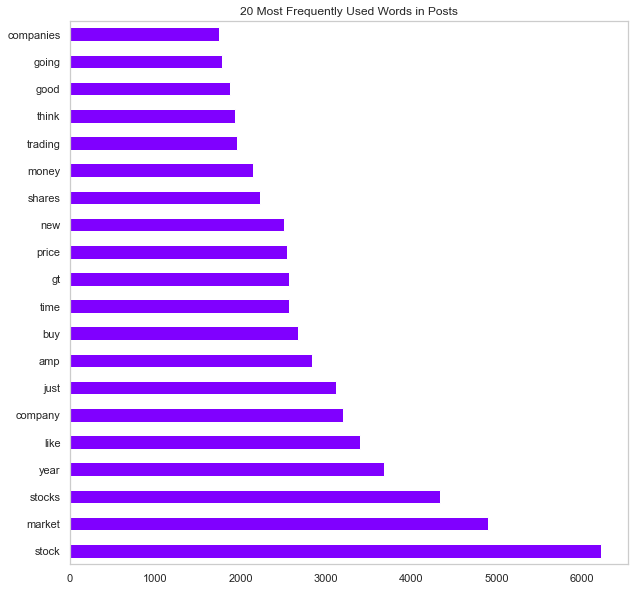

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
cvtext.sum().sort_values(ascending=False)[:20].plot(
    kind='barh',
    cmap='rainbow');
plt.grid(b=None)
plt.title("20 Most Frequently Used Words in Posts")

In [11]:
#adding subreddit to df for grouping
cvtext['subreddit'] = text_y

In [36]:
cvtext.groupby('subreddit').sum().T.sort_values(by='stocks', ascending=False).head(10)

subreddit,stocks,wallstreetbets
stock,4585,1636
stocks,3470,855
market,3406,1489
year,2395,1279
gt,2376,187
like,2225,1171
company,2223,975
just,1915,1203
amp,1831,998
buy,1709,957


Text(0.5, 1.0, 'Top 20 r/Stocks Words by Usage vs. r/WSB')

<Figure size 720x720 with 0 Axes>

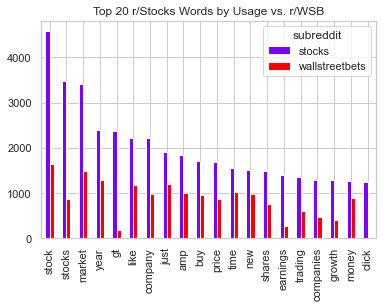

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10));
cvtext.groupby('subreddit').sum().T.sort_values(by='stocks', ascending=False).head(20).plot(kind='bar', cmap='rainbow')
#plt.grid(b=None)
plt.title("Top 20 r/Stocks Words by Usage vs. r/WSB")

In [14]:
cvtext.groupby('subreddit').sum().T.sort_values(by='wallstreetbets', ascending=False).head(20)

subreddit,stocks,wallstreetbets
stock,4585,1636
market,3406,1489
year,2395,1279
just,1915,1203
like,2225,1171
time,1548,1017
amp,1831,998
new,1513,984
company,2223,975
buy,1709,957


Text(0.5, 1.0, 'Top 20 r/WSB Words by Usage vs. r/Stocks')

<Figure size 720x720 with 0 Axes>

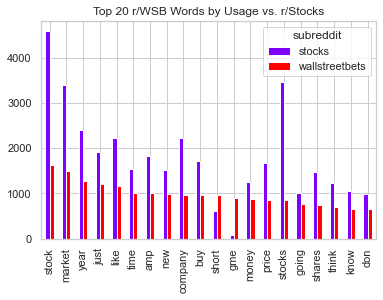

In [15]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10));
cvtext.groupby('subreddit').sum().T.sort_values(by='wallstreetbets', ascending=False).head(20).plot(kind='bar', cmap='rainbow');
#plt.grid(b=None)
plt.title("Top 20 r/WSB Words by Usage vs. r/Stocks")

In [19]:
#define x and y (ticker text and subreddit)
ticker_x= tickers['ticker_text']
ticker_y= tickers['subreddit']

In [20]:
#instantiate count vectorizer and fit on all ticker text
cv=CountVectorizer()
cv.fit(ticker_x)

CountVectorizer()

In [21]:
#transform all ticker text
ticker_cv = cv.transform(ticker_x)

In [22]:
#create data frame of cv'ed ticker text data
cvtickers = pd.DataFrame(ticker_cv.todense(), columns=cv.get_feature_names())
cvtickers.head()

,aa,aaa,aab,aabb,aabvf,aag,aagiy,aaii,aal,aamco,...,znog,zom,zoom,zq,zs,zsan,zts,zyng,zynga,zyxi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#20 most frequently used words in ticker text corpus
cvtickers.sum().sort_values(ascending=False)[:20]

gme     609
us      444
tsla    332
spy     290
dd      269
amc     251
ev      237
ipo     223
aapl    182
nvda    179
amd     178
qqq     170
yolo    160
msft    153
baba    124
voo     112
to      110
ira     108
vti     102
amzn     97
dtype: int64

Text(0.5, 1.0, '20 Most Frequently Mentioned Tickers')

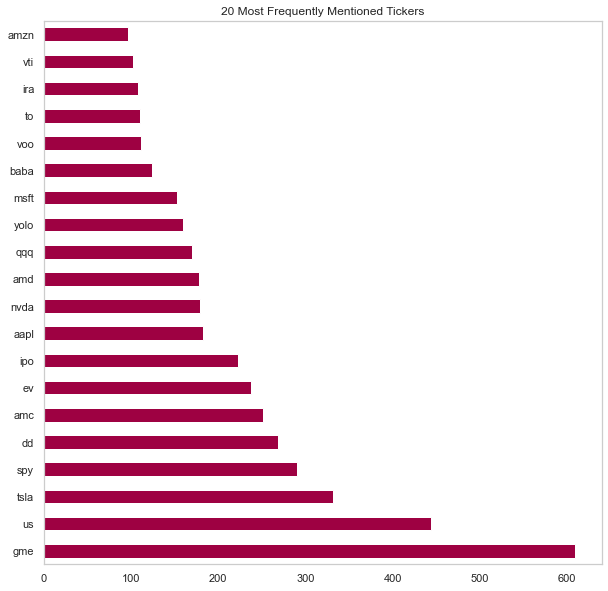

In [24]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
cvtickers.sum().sort_values(ascending=False)[:20].plot(
    kind='barh',
    cmap='Spectral');
plt.grid(b=None)
plt.title("20 Most Frequently Mentioned Tickers")

In [25]:
#adding subreddit to df for grouping
cvtickers['subreddit'] = ticker_y

In [26]:
ticker_y.value_counts()

stocks            4330
wallstreetbets    4012
Name: subreddit, dtype: int64

In [35]:
cvtickers.groupby('subreddit').sum().T.sort_values(by=['wallstreetbets'], ascending=False).head(20)

subreddit,wallstreetbets
gme,259
us,204
tsla,140
dd,131
spy,116
ev,114
amd,93
amc,92
ipo,90
qqq,80


In [30]:
cvtickers['subreddit'].isna().sum()

4700

In [32]:
cvtickers[cvtickers['subreddit']=='stocks']

,aa,aaa,aab,aabb,aabvf,aag,aagiy,aaii,aal,aamco,...,zom,zoom,zq,zs,zsan,zts,zyng,zynga,zyxi,subreddit


In [33]:
#Whatever is going on here is absolutely baffling there's no reason for it why are all the stocks subreddit tags gone?